In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [5]:
titanic_df = pd.read_csv('C:\Users\Deon\Downloads\data_train.csv')

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

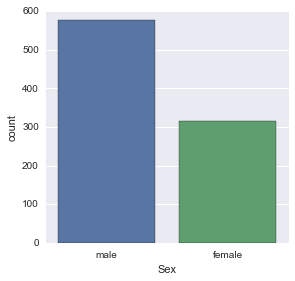

In [18]:
sns.factorplot('Sex',data=titanic_df,kind='count')

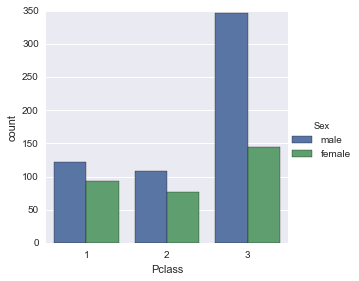

In [36]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count',order=[1,2,3])

In [37]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
    

In [38]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

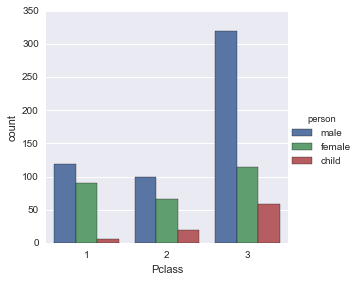

In [39]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person')

## Some Survival demographics

In [74]:
print titanic_df['Age'].mean() #average age of passengers on the titanic
survived = titanic_df[titanic_df['Survived'] ==1].groupby('person')
print survived['Age'].mean()


29.6991176471
person
child      5.778980
female    32.446746
male      34.069444
Name: Age, dtype: float64


In [70]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [79]:
titanic_df['person'].value_counts()


male      537
female    271
child      83
Name: person, dtype: int64

In [82]:
deck = titanic_df['Cabin'].dropna()
deck.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
E101               3
F33                3
F2                 3
D                  3
C22 C26            3
E24                2
C2                 2
B35                2
B51 B53 B55        2
B20                2
C93                2
D17                2
B18                2
E25                2
E67                2
E8                 2
B57 B59 B63 B66    2
E121               2
C68                2
D20                2
C65                2
B77                2
B58 B60            2
B5                 2
D26                2
C83                2
C92                2
                  ..
F G63              1
A6                 1
D6                 1
D56                1
A10                1
C101               1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14                1
C91          

In [38]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

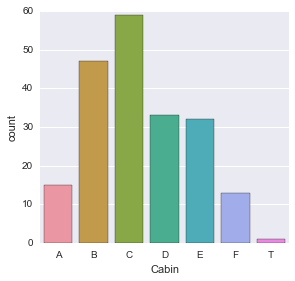

In [86]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,kind='count',
               order=['A','B','C','D','E','F','T'])

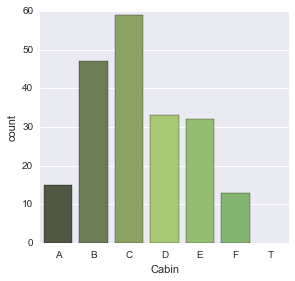

In [88]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,palette='summer_d',kind='count',
               order=['A','B','C','D','E','F','T'])

In [53]:
# Who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [109]:
titanic_df['Family/Alone'] = titanic_df.SibSp + titanic_df.Parch

#sibsp           Number of Siblings/Spouses Aboard
#parch           Number of Parents/Children Aboard


In [110]:
titanic_df['Family/Alone'].loc[titanic_df['Family/Alone'] > 0] = 'With Family'

titanic_df['Family/Alone'].loc[titanic_df['Family/Alone'] == 0] = 'Alone'


In [111]:
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Family/Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


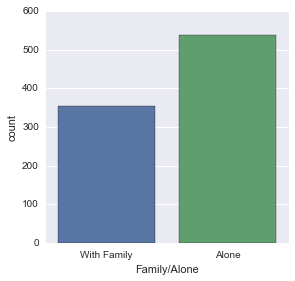

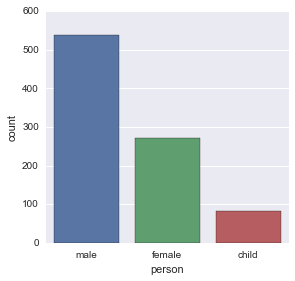

In [121]:
sns.factorplot('Family/Alone',data=titanic_df,kind='count')

sns.factorplot('person',data=titanic_df,kind='count')
#sns.swarmplot(x='person', y = 'Pclass', data=titanic_df)

In [122]:
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'no',1:'yes'})

In [62]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no


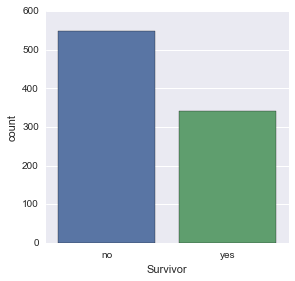

In [133]:
sns.factorplot('Survivor',data=titanic_df,kind='count')